In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/kavya/Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [7]:
df['Species']=le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
print("accuracy:",model.score(x_train,y_train)*100)
print("accuracy:",model.score(x_test,y_test)*100)

accuracy: 97.14285714285714
accuracy: 91.11111111111111


In [12]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
 
from keras.utils import np_utils

In [13]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [19]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)


Epoch 1/10
6/6 [==============================] - 0s 26ms/step - loss: 0.1846 - accuracy: 0.9524 - val_loss: 0.1137 - val_accuracy: 0.9556
Epoch 2/10
6/6 [==============================] - 0s 18ms/step - loss: 0.1600 - accuracy: 0.9238 - val_loss: 0.0834 - val_accuracy: 0.9556
Epoch 3/10
6/6 [==============================] - 0s 18ms/step - loss: 0.2120 - accuracy: 0.9143 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 19ms/step - loss: 0.1229 - accuracy: 0.9333 - val_loss: 0.1163 - val_accuracy: 0.9556
Epoch 5/10
6/6 [==============================] - 0s 18ms/step - loss: 0.2764 - accuracy: 0.8857 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 19ms/step - loss: 0.2505 - accuracy: 0.9143 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.2062 - accuracy: 0.8952 - val_loss: 0.0717 - val_accuracy: 0.9556
Epoch 8/10
6/6 [===========

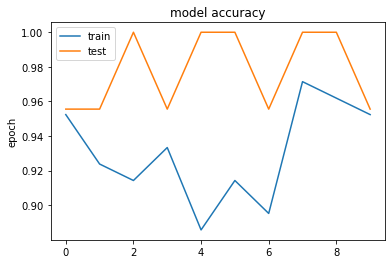

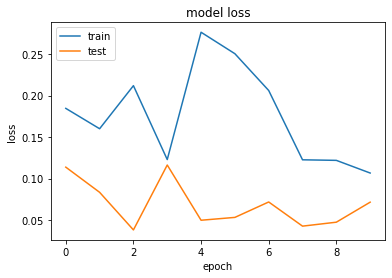

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
